# Argentina programa 4.0 - Módulo 2: Ciencia de Datos 

---
## Ejercícios Semana 1. Elementos de matemática y probabilidad


## Funciones 

### Ejercicio 1

Para cada una de las siguientes funciones matemáticas, escribir funciones de Python que reciban el valor de la variable `x` como input y que devuelvan el valor correspondiente de la variable dependiente `y`. 

 * $y = 3x^2 + 3x - 6$
 * $y = 3x - 6$
 * $y = x^3$
 * $y = \frac{1}{1 + e^{-x}}$
 * $y = \frac{1}{2} x + 1$
 * $y = x^2 + 1$

 Para todos los casos graficar las funciones usando matplotlib, con valores de `x` en el rango $-5, 5$.

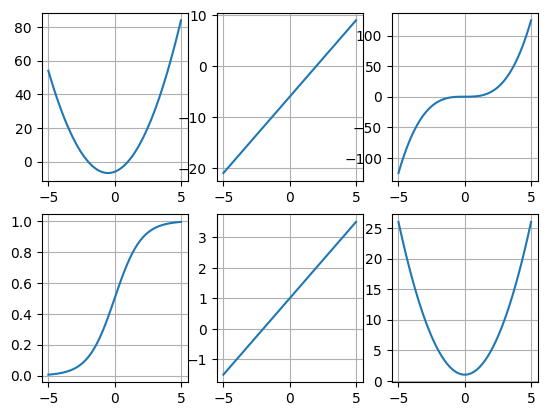

In [1]:
import math 
import numpy as np 

def equation_1(x):
  return 3 * x**2 + 3 * x - 6

def equation_2(x):
  return 3 * x - 6

def equation_3(x):
  return x ** 3

def equation_4(x):
  # usamos el numero e (Euler) de
  return 1 / (1 + np.exp(-x)) 

def equation_5(x):
  return 1/2*x+1

def equation_6(x):
  return x**2+1

# usamos numpy linspace para generar varios numeros dentro del rango
# pero espaciados equidistantemente (para que las curvas sean mas suaves)
x = np.linspace(-5, 5, 50) # 50 numeros deberian ser suficiente

y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []

for val in x: 
  y1.append(equation_1(val))
  y2.append(equation_2(val))
  y3.append(equation_3(val))
  y4.append(equation_4(val))
  y5.append(equation_5(val))
  y6.append(equation_6(val))

import matplotlib.pyplot as plt
fig = plt.figure()

ax1 = fig.add_subplot(2,3,1, xbound=[-5, 5])
ax1.grid()

ax2 = fig.add_subplot(232, sharex=ax1)
ax2.grid()

ax3 = fig.add_subplot(233, sharex=ax1)
ax3.grid()

ax4 = fig.add_subplot(234, sharex=ax1)
ax4.grid()

ax5 = fig.add_subplot(235, sharex=ax1)
ax5.grid()

ax6 = fig.add_subplot(236, sharex=ax1)
ax6.grid()

ax1.plot(x,y1)
ax2.plot(x,y2)
ax3.plot(x,y3)
ax4.plot(x,y4)
ax5.plot(x,y5)
ax6.plot(x,y6)




### Ejercicio 2

#### Velocidad de cambio de funciones con Numpy gradient

NumPy tiene implementados algunos algoritmos de aproximación para encontrar la pendiente de rectas cercanas a la tangente. Como NumPy desconoce la función, hace la estimación solamente en base a los números que existen en el array (ver referencias).

Dado un array de números, `numpy.gradient` devuelve un array con valores de derivadas (pendientes) del array original. Los valores negativos indican que la función `decrece` en ese punto. Los valores positivos indican que la función `crece` en ese punto. 

**Referencias:**

 * [NumPy gradient](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html)
 * [Finite difference](https://en.wikipedia.org/wiki/Finite_difference)


Para las funciones del ejercicio anterior, generar 10, 50, 100 y 1000 valores en el rango $-5, +5$ (tip: `numpy.linspace`) y obtener los correspondientes arrays de pendientes usando `numpy.gradient`. 

En cada caso, iterar para encontrar el punto de cambio de la función si existe. Informar el valor de $x$ donde la función cambia de signo y si es un mínimo o un máximo. 

*Obvio que pueden imprimir y mirar el array que devuelve `numpy.gradient` a ojo y encontrar los puntos de cambio de signo de la función pero a modo de ejercitación está bueno encontrarlos programáticamente.*

Cómo cambia la estimación del punto de cambio de la función a medida que aumentamos el número de puntos (valores) en nuestro rango de interés? Cuánto se acercan a cero las pendientes a medida que aumentamos el número de puntos?

In [4]:
import numpy as np

# usamos numpy linspace para generar varios numeros dentro del rango
# pero espaciados equidistantemente (para que las curvas sean mas suaves)
x = np.linspace(-5, 5, 1000) # 10 numeros es la consigna inicial
#print(x)

y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []

for val in x: 
  y1.append(equation_1(val))
  y2.append(equation_2(val))
  y3.append(equation_3(val))
  y4.append(equation_4(val))
  y5.append(equation_5(val))
  y6.append(equation_6(val))

# convertimos las listas en arrays numpy 
ny1 = np.array(y1)
ny2 = np.array(y2)
ny3 = np.array(y3)
ny4 = np.array(y4)
ny5 = np.array(y5)
ny6 = np.array(y6)

# obtenemos las aproximaciones a las pendientes usando gradient
g1 = np.gradient(ny1)
g2 = np.gradient(ny2)
g3 = np.gradient(ny3)
g4 = np.gradient(ny4)
g5 = np.gradient(ny5)
g6 = np.gradient(ny6)

# print(g1, g2, g3, g4, g5, g6)

# ahora iteramos por las pendientes e identificamos cuando cambia de signo 
derivada_anterior = 0
signo_anterior = 0
counter = 0

# esto es para la funcion 1 
# y1 valores de y para la funcion 1
# ny1 valores de y en forma de array numpy 
# g1 valores de pendientes de la funcion 1 (gradient)
for derivada in np.nditer(g1):
  counter += 1
  if derivada < 0:
    signo = "-"
  else: 
    signo = "+"
  
  if signo_anterior == 0:
    signo_anterior = signo
    derivada_anterior = derivada
    continue
  else: 
    if signo_anterior == signo:
      continue
    else: 
      print("Anterior:", "Pendiente:", g1[counter-2], "X:", x[counter-2], "Posterior:", "Pendiente:", derivada, "X:", x[counter-1])
      signo_anterior = signo
  
# haciendo lo mismo para las funciones 2, 3, 4, 5, y 6 (g2, g3, g4, g5, g6) 
# se obtienen las respuestas para las otras funciones 

# usando este mismo codigo con distintos parametros de linspace (10, 50, 100, 1000)
# se puede responder la pregunta sobre aproximación a cero de las pendientes

Anterior: Pendiente: -0.0003306609913216185 X: -0.5055055055055053 Posterior: Pendiente: 0.0002705408110816876 X: -0.4954954954954953


## Extra

Acá les dejamos además un extra. Para los que preguntaron en discord como visualizar las pendientes, es posible graficar las rectas pendientes. El codigo abajo hace esto. Los valores de las variables y1 y g1 son para la funcion f1. Si usan y2 y g2 pueden graficar las de f2 ... ya ven la idea. 

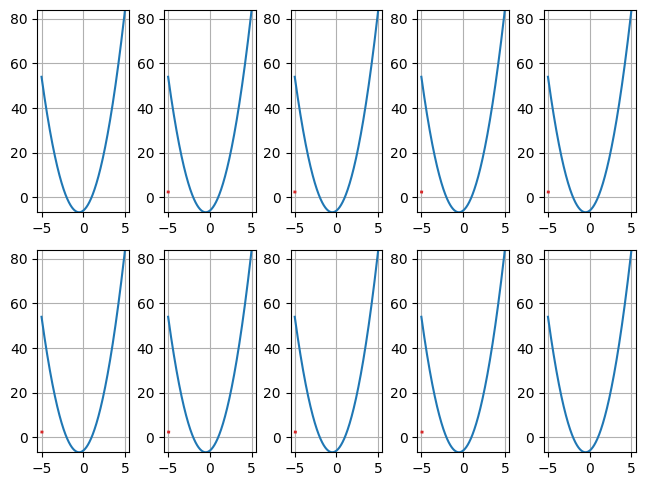

In [9]:
import matplotlib.pyplot as plt
import numpy as np 

# en este codigo si queremos ver las pendientes de la funcion f1
# usamos las variables y1 (valores de y para f1) 
# y g1 (valores de pendientes o derivadas para f1) 
# si quieren ver como dan f2, f3, f4 ... 
# reemplazar las variables (y2, g2; y3, g3, etc.)

# inicializamos figura 
fig = plt.figure()

# este es el numero de puntos que tenemos (10, 50, 100, ...)
# para este ejemplo empezamos por 10
data_points = 10

for i in range(0, data_points):
  plot = i + 1
  # generamos un sistema de ejes para cada data point
  ax = fig.add_subplot(2,5,plot, xbound=[-5,5])
  # ploteamos la funcion original, en este caso f1
  ax.plot(x, y1)
  ax.set_ylim(np.amin(y1),np.amax(y1))
  ax.grid()

  # y además ploteamos las distintas pendientes
  # para eso usamos la pendiente i que nos devuelve np.gradient
  # y al menos dos puntos en x
  # cuales dos puntos? bueno puede ser buena idea tomar el punto x-1 y x+1 con respecto al punto x 
  # pero ojo! en el primer data point no existe x-1, y en el ultimo no existe x+1 !
  if i != 0 and i < (data_points - 1):
    # generamos un miniarray de valores en x de 3 puntos para graficar las rectas 
    rx = np.linspace(x[i-1], x[i+1], 3)
    a = g1[i] # el valor i del array np.gradient (la pendiente)
    b = 1     # un valor de ordenada al origen cualquiera 
    ry = a * rx + b # nuestra funcion de la recta i
    ax.plot(rx, ry, color='tab:red', linewidth=2)
  

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=1.0)


## Probabilidad

### Ejercicio 1

A partir de un estudio realizado por una asociación de conductores de autopista mostró que el 60% de los mismos utilizan el cinturón de seguridad correctamente. Si se selecciona una muestra de 10 conductores en una autopista. ¿Cuál es la probabilidad de que exactamente 7 de ellos lleven el cinturón de seguridad?

_Tip_: usar la distribución binomial

El problema es muy similar al de contar el número de caras cuando se tiran 10 monedas. Aqui la respuesta también es binária: tener o no el cinturón puesto correctamente. La diferencia es que no hay la misma probabilidad de tener o no el cinturón (como era el caso de las monedas). Aqui tenemos 60% de probabilidad de sí (llevar puesto el cinturón). Tenemos que recurrir a la distribución binomial (porque son resultados binários). Recordando la fórmula: 
$f(n) = \frac{N!}{n!(N-n)!} p^n q^{N-n}$.

Aquí _N_ es el número de conductores (o sea, el muestreo, análogo al número de tiradas de la moneda), que es 10. _p_ es la probabilidad de que lleven el cinturón, 60%, o sea, 0.6 y _q = 1 - p_. Queremos saber la probabilidad de que 7 lleven el cinturón puesto, así que _n = 7_.

En la práctica, podemos usar la expresión de arriba o bien usar directamente la función de SciPy para la distribución binomial
```
binom.pmf(n, N, p)
```
¡Ahora estamos listos! 

In [10]:
# Usando la fórmula:
from math import factorial
factorial(10)/(factorial(10-7)*factorial(7))*((0.6)**7)*((1-0.6)**(10-7))

0.21499084799999998

In [11]:
# Usando la función binomial de SciPy
from scipy.stats import binom
binom.pmf(7, 10, 0.6)

0.21499084799999987

La probabilidad es del 21.5%.

### Ejercicio 2:

En el examen del final del módulo de Python, los participantes tenían que responder a 10 preguntas multiple-choice con cuatro opciones, siendo solo una de ellas la correcta. 

a) Simular el experimento de responder a las preguntas aleatoriamente y guardar la cantidad de respuestas correctas en cada caso. Hacer un histograma con los resultados obtenidos.

b) Sabiendo que se aprueba con al menos 6 respuestas correctas, ¿Cuál es la probabilidad de aprobar respondiendo aleatoriamente obtenida en el experimento anterior?

c) Calcular el valor medio, la mediana y la moda de los resultados obtenidos.


Empezamos simulando las respuestas al azar. Por simplicidad, vamos a elegir que la respuesta correcta, en cada una de las 10 preguntas sea la primera. Como las respuestas son siempre aleatórias, no cambiará nada si a cada una de las 10 preguntas le asignáramos otra opción correcta entre las 4 disponibles.

In [16]:
import random
N = 100000      # Aqui vamos a simular 100.000 exámenes. Cada examen es una "tirada" de 10 preguntas respondidas aleatóriamente
resultados = [] # lista en la que guardo resultados

for i in range(N):
  correctas = 0   # esa variable nos va a medir la cantidad de respuestas correctas en cada prueba
  for i in range(10):
    res = random.randint(1, 4) # generamos números entre 1 y 4, que son las respuestas
    if res == 1: correctas += 1 # la respuesta es correcta si es uno, en las 10 pregunta
  
  # Equivalentemente
  # correctas = sum([random.randint(1, 4) for i in range(10)])

  resultados.append(correctas) # ahora creamos un array que contiene en número de respuestas correctas en cada prueba

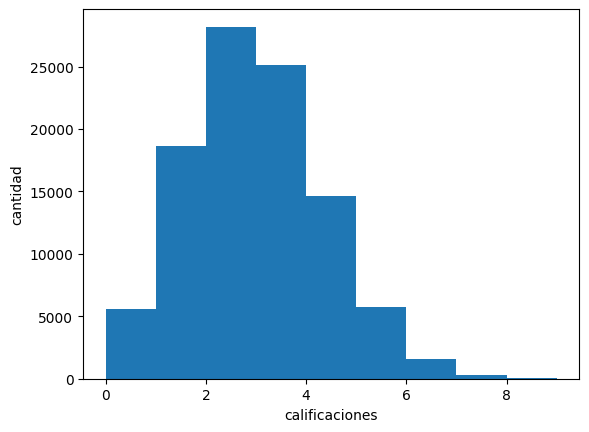

In [17]:
# ahora hacemos el histograma de los resultados
import matplotlib.pyplot as plt

plt.figure()
plt.hist(resultados, bins=9)
plt.xlabel('calificaciones')
plt.ylabel('cantidad')
plt.show()

"Sabiendo que se aprueba con al menos 6 respuestas correctas, ¿Cuál es la probabilidad de aprobar respondiendo aleatoriamente obtenida en el experimento anterior?"

Queremos contar cuantos resultados (pruebas) tienen nota mayor a 6 y dividir por el número todas las pruebas

In [19]:
# número de aprobados, donde ser aprobado es tener nota mayor a 6
aprobados = len([num for num in resultados if num > 6]) 
aprobados


353

La probabilidad de aprobar respondiendo aleatoriamente es

In [20]:
aprobados/N

0.00353

Para calcular el valor medio, la moda y la mediana, simplemente hacemos:

In [21]:
import numpy as np
from scipy import stats
print('Promedio:', np.mean(resultados))
print('Mediana:', np.median(resultados))
print('Moda:', stats.mode(resultados).mode)

Promedio: 2.5014
Mediana: 2.0
Moda: [2]


C:\Users\mati_\AppData\Local\Temp\ipykernel_10388\811203794.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('Moda:', stats.mode(resultados).mode)


**Extra**: 

¿En lugar de simular las pruebas y sus respuestas, podríamos haber obtenido directamente la distribución de probabilidad?

¡La respuesta es afirmativa!

En cada pregunta, la probabilidad de tener la respues correcta aleatoriamente es 1/4 = 0.25. Nuevamente es un experimento binário, en que podemos tener la respuesta correcta (con p = 0.25) o incorrecta (con q = 0.75). Usaremos la distribución binomial, teniendo en cuente de que hay 10 preguntas (un muestreo de _N_ = 10).
La probabilidad de tener _n_ opciones correctas es:
$f(n) = \frac{10!}{n!(10-n)!} (0.25)^n (0.75)^{10-n}$.

A partir de ahí, calcule la probabi

### Ejercicio 3

Los resultados de un examen, cuya nota máxima posible es 100, siguen una distribución normal con media 68 y desviación típica 12.

Realice un gráfico de esta distribución normal para el intervalo
¿Cuál es la probabilidad de que una persona que se presenta el examen obtenga una calificación superior a 72?
Calcular la proporción de estudiantes que tienen puntuaciones que exceden por lo menos en cinco puntos de la puntuación que marca la frontera entre el Apto y el No-Apto; sabiendo que son declarados No-Aptos el 25% de los estudiantes que obtuvieron las puntuaciones más bajas.
Si se sabe que la calificación de un estudiante es mayor que 72, ¿cuál es la probabilidad de que su calificación sea, de hecho, superior a 84?

Empecemos haciendo el gráfico de la distribución

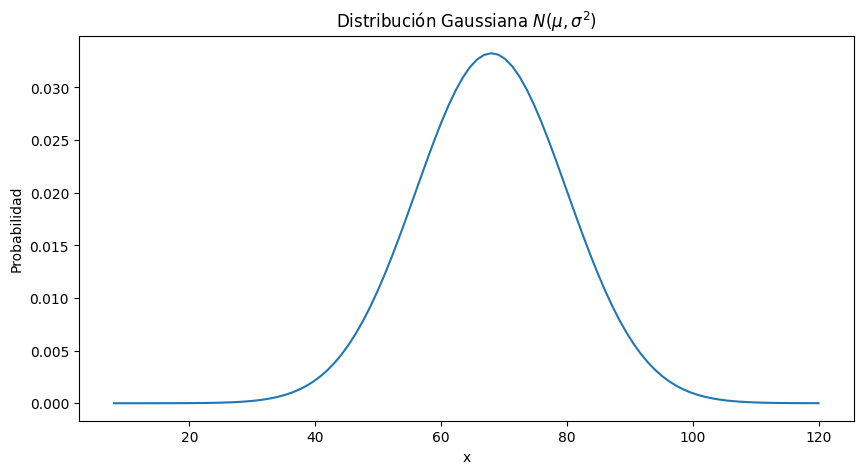

In [30]:
# hacemos las importaciones
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

#definimos la gaussiana
mu=68.0
sigma=12.0
mi_gaussiana=norm(loc=mu,scale=sigma)
x = np.linspace(8.0,120.0,100)

plt.figure(figsize = (10, 5))
plt.plot(x,mi_gaussiana.pdf(x))
plt.title(f"Distribución Gaussiana $N(\mu,\sigma^2)$")
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.show()

Para calcular la probabilidad de que una persona obtenga una cualificación superior a 72, tenemos que calcular el área bajo la gaussiana entre 72 e infinito.

In [31]:
from scipy.integrate import quad
x_lower = 72 # limite inferior
x_upper = np.inf # limite superior 

val, abserr = quad(mi_gaussiana.pdf, x_lower, x_upper)
print(val)

# Tambien podemos usar sf de Scipy
print(mi_gaussiana.sf(72))              # Survival function  1-cdf

0.3694413401817636
0.36944134018176367


La probabilidad de obtner una cualificación superior a 72 es 36.9%

"Calcular la proporción de estudiantes que tienen puntuaciones que exceden por lo menos en cinco puntos de la puntuación que marca la frontera entre el Apto y el No-Apto; sabiendo que son declarados No-Aptos el 25% de los estudiantes que obtuvieron las puntuaciones más bajas".

Primero calculemos la calificación que engloba al 25% de notas más bajas, o sea, que corresponde al primer cuartil:

In [32]:
# para obtener el 1er cuartil (cuantil que contiene 25% del área) hacemos:
value = mi_gaussiana.ppf(0.25)       
#value = norm.ppf(0.98, loc = 15, scale = 2)    # ppf = Percent point function 
value

59.90612299764702

Por la definición, ese (59.9) es el valor de corte entre aptos y no aptos. Ahora queremos saber la proporciónde estudiantes que tienen puntuaciones que exceden en 5 puntos esa frontea, o sea, que exceden, 64.9.

In [33]:
print(mi_gaussiana.sf(64.9))              # Survival function  1-cdf

0.6019251685894629


La proporción de estudiantes que exceden en 5 puntos la nota de corte entre aptos y no aptos, por lo tento, es 60.2%.

"Si se sabe que la calificación de un estudiante es mayor que 72, ¿cuál es la probabilidad de que su calificación sea, de hecho, superior a 84?"

Para responder a esa pregunta, necesitamos calcular la razón entre el área de la cuva después de 72 con el área después de 84. ¿Por que? Porque al calcular el área después de 72 nos estamos restringiendo a la fracción que tiene notas mayores a 72. Dentro de ese grupo, queremos saber la probabilidad de que la nota sea mayor a 84. O sea, el ára después de 84 relativo al área después de 72.

In [34]:
# Fraccion de alumnos con calificación mayor a 72:
Area72 = mi_gaussiana.sf(72)
Area84 = mi_gaussiana.sf(82)
# Fracción de alumnos con nota mayor a 72 que tiene nota superior a 84:
Area84/Area72

0.3293418774263834

O sea que la probabilidade de que la calificación sea superior a 84 para los que tuvieron nota superior a 72 es 32.9%.